# Project

We will be downloading the datasets as a zip file from the website "https://www.fao.org/faostat/en/#data/QCL", from the All Data Normalized option. After loading the data we will be extracting data and analyse the data. In this case the zip file should be in the same dicrectory as this notebook.

We will also be working on the population data. So that we can understand how the use is land will complement the population of that area. We will be loading data from the website given below. We should also be considering that the zip file should be in the same directory as this notebook.
"https://population.un.org/wpp/Download/Archive/CSV/".

In [1]:
import numpy as np 
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

# Extracting the .zip files

In [2]:
with zipfile.ZipFile("Production_Crops_Livestock_E_All_Data_(Normalized).zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [3]:
with zipfile.ZipFile("WPP2019-CSV-data.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

# Reading the data

In [4]:
df_main = pd.read_csv("targetdir/Production_Crops_Livestock_E_All_Data_(Normalized).csv" ,encoding='cp1252')
df_main.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [5]:
df_pop = pd.read_csv("targetdir/WPP2019_TotalPopulationBySex.csv" ,encoding='cp1252')
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


# Merging Datasets

In [6]:
df = pd.merge(df_main, df_pop,  how='inner', left_on=['Area','Year'], right_on = ['Location','Time'])
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,...,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
2,2,'004,Afghanistan,515,'01341,Apples,5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
3,2,'004,Afghanistan,515,'01341,Apples,5419,Yield,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
4,2,'004,Afghanistan,515,'01341,Apples,5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436


# Cleaning

In [7]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 4633218
Total Number of columns : 23


In [8]:
df.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'LocID', 'Location', 'VarID', 'Variant', 'Time', 'MidPeriod',
       'PopMale', 'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')

### Removing Null Data

In [9]:
df.isnull().sum()

Area Code              0
Area Code (M49)        0
Area                   0
Item Code              0
Item Code (CPC)        0
Item                   0
Element Code           0
Element                0
Year Code              0
Year                   0
Unit                   0
Value                  0
Flag                   0
LocID                  0
Location               0
VarID                  0
Variant                0
Time                   0
MidPeriod              0
PopMale            59499
PopFemale          59499
PopTotal               0
PopDensity             0
dtype: int64

In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
df.isnull().sum()

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
LocID              0
Location           0
VarID              0
Variant            0
Time               0
MidPeriod          0
PopMale            0
PopFemale          0
PopTotal           0
PopDensity         0
dtype: int64

### Spliting the data

In [12]:
pd.set_option('display.max_columns', None)
print(df.head())

   Area Code Area Code (M49)         Area  Item Code Item Code (CPC)  \
0          2            '004  Afghanistan        221          '01371   
1          2            '004  Afghanistan        221          '01371   
2          2            '004  Afghanistan        515          '01341   
3          2            '004  Afghanistan        515          '01341   
4          2            '004  Afghanistan        515          '01341   

                Item  Element Code         Element  Year Code  Year    Unit  \
0  Almonds, in shell          5312  Area harvested       1975  1975      ha   
1  Almonds, in shell          5510      Production       1975  1975  tonnes   
2             Apples          5312  Area harvested       1975  1975      ha   
3             Apples          5419           Yield       1975  1975   hg/ha   
4             Apples          5510      Production       1975  1975  tonnes   

     Value Flag  LocID     Location  VarID Variant  Time  MidPeriod   PopMale  \
0      0.0 

In [13]:
df_area = df[['Area Code','Area Code (M49)','Area']].copy()
df_area.head()

,Area Code,Area Code (M49),Area
0,2,'004,Afghanistan
1,2,'004,Afghanistan
2,2,'004,Afghanistan
3,2,'004,Afghanistan
4,2,'004,Afghanistan


In [14]:
df_item = df[['Item Code','Item Code (CPC)','Item']].copy()
df_item.head()

,Item Code,Item Code (CPC),Item
0,221,'01371,"Almonds, in shell"
1,221,'01371,"Almonds, in shell"
2,515,'01341,Apples
3,515,'01341,Apples
4,515,'01341,Apples


In [15]:
df_element = df[['Element Code','Element']].copy()
df_element.head()

,Element Code,Element
0,5312,Area harvested
1,5510,Production
2,5312,Area harvested
3,5419,Yield
4,5510,Production


In [16]:
df_location = df[['LocID','Location']]
df_location.head()

,LocID,Location
0,4,Afghanistan
1,4,Afghanistan
2,4,Afghanistan
3,4,Afghanistan
4,4,Afghanistan


In [17]:
df_variant = df[['VarID','Variant']]
df_variant.head()

,VarID,Variant
0,2,Medium
1,2,Medium
2,2,Medium
3,2,Medium
4,2,Medium


In [18]:
df = df.drop(['Area','Area Code (M49)','Item','Item Code (CPC)','Element','Year Code','Time','Variant','Location','MidPeriod'], axis=1)

In [19]:
df = df.rename(columns={'Area Code': 'Area','Item Code': 'Item','Element Code':'Element','LocID':'Location','VarID':'Variant'})

### Convering data into numeric values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573719 entries, 0 to 4633217
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        object 
 5   Value       float64
 6   Flag        object 
 7   Location    int64  
 8   Variant     int64  
 9   PopMale     float64
 10  PopFemale   float64
 11  PopTotal    float64
 12  PopDensity  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 488.5+ MB


In [21]:
le = LabelEncoder()
df['Unit'] = df[['Unit']].apply(le.fit_transform)
df['Flag'] = df[['Flag']].apply(le.fit_transform)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573719 entries, 0 to 4633217
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        int64  
 5   Value       float64
 6   Flag        int64  
 7   Location    int64  
 8   Variant     int64  
 9   PopMale     float64
 10  PopFemale   float64
 11  PopTotal    float64
 12  PopDensity  float64
dtypes: float64(5), int64(8)
memory usage: 488.5 MB


# EDA:

In [23]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
Area,4573719.0,1.254400e+03,2.127966e+03,1.000,84.000,159.000,249.000,5.504000e+03
Item,4573719.0,8.455887e+02,1.259929e+03,15.000,358.000,600.000,1058.000,1.753000e+04
Element,4573719.0,5.408217e+03,1.028571e+02,5111.000,5312.000,5419.000,5510.000,5.513000e+03
Year,4573719.0,2.001514e+03,1.887429e+01,1961.000,1987.000,2006.000,2020.000,2.021000e+03
Unit,4573719.0,8.583100e+00,2.901420e+00,0.000,7.000,10.000,11.000,1.100000e+01
Value,4573719.0,2.537688e+06,3.091745e+07,0.000,2378.000,22563.000,156931.700,3.070645e+09
Flag,4573719.0,8.588962e-01,8.410015e-01,0.000,0.000,1.000,1.000,4.000000e+00
Location,4573719.0,5.977271e+02,6.614923e+02,4.000,266.000,528.000,840.000,5.501000e+03
Variant,4573719.0,1.711881e+01,5.138552e+01,2.000,2.000,2.000,4.000,2.070000e+02
PopMale,4573719.0,1.181795e+05,4.226900e+05,20.799,2304.234,8407.832,43178.393,3.974825e+06


<AxesSubplot: title={'center': 'Correlation of Attributes'}>

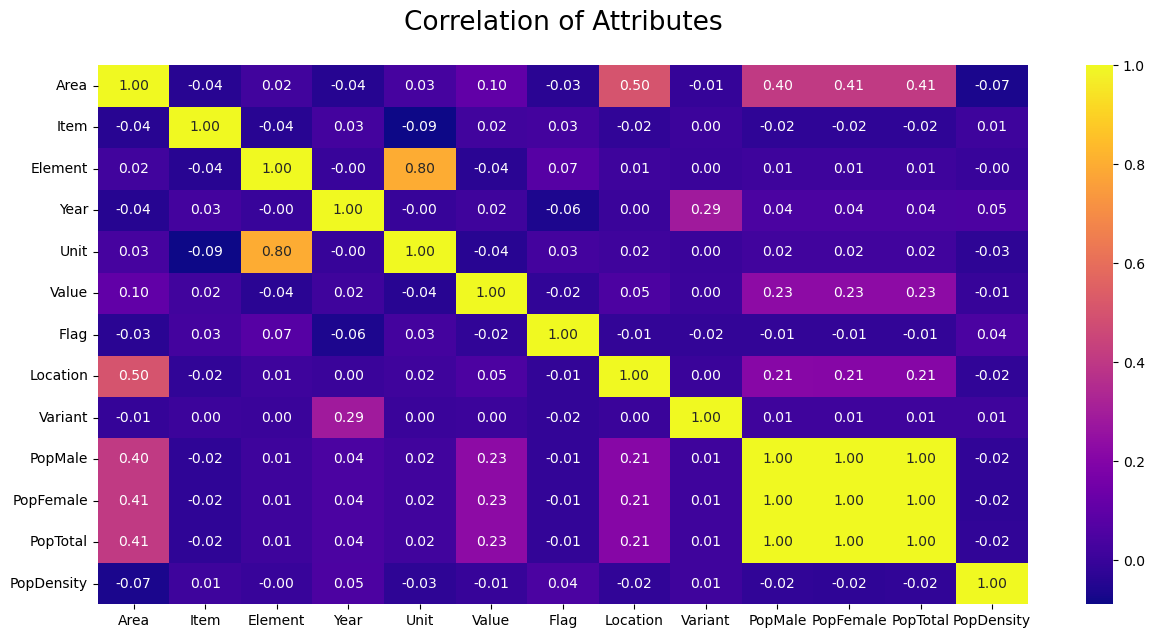

In [24]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

<AxesSubplot: >

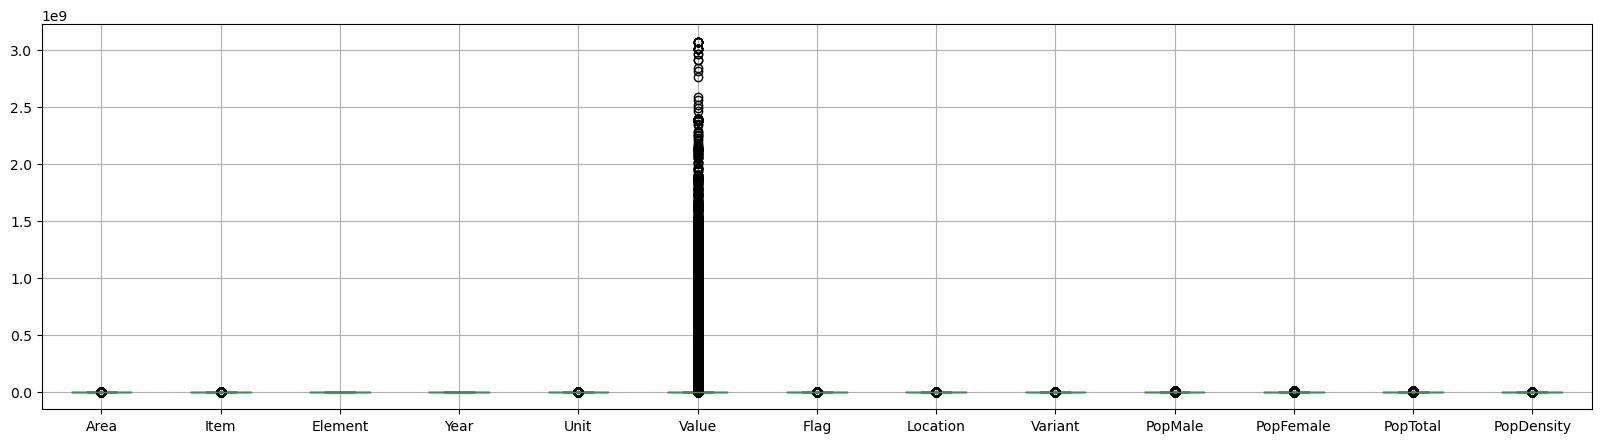

In [25]:
df.boxplot(return_type='axes', figsize=(20,5))

## Finding Outliners

In [26]:
#We get only continious values to find the outliers
cat = ['Area','Item','Element','Location','Variant','Unit','Flag','Year']
df_test = df.drop(cat,axis=1)

In [27]:
df_test.groupby('Value').first()

,PopMale,PopFemale,PopTotal,PopDensity
Value,,,,
0.000000e+00,6446.273,6242.891,12689.164,19.436
1.000000e-02,2205.325,2121.008,4326.333,4120.317
2.000000e-02,96.367,94.769,191.136,8.379
3.000000e-02,128.405,126.663,255.068,11.182
4.000000e-02,43.373,47.034,90.407,205.470
...,...,...,...,...
2.911950e+09,3763157.221,3700864.713,7464021.934,57.374
2.962815e+09,3889034.611,3824433.594,7713468.205,59.291
2.966111e+09,3805469.093,3742389.807,7547858.900,58.018


In [28]:
df_test.groupby('PopTotal').first()

,Value,PopMale,PopFemale,PopDensity
PopTotal,,,,
42.234,450.0,20.849,21.385,52.141
42.460,6.0,20.799,21.661,92.304
43.283,470.0,21.370,21.913,53.436
43.461,6.0,21.336,22.125,94.480
44.342,500.0,21.901,22.441,54.743
...,...,...,...,...
7874751.698,174067.0,3970061.482,3904690.216,60.531
7874965.732,174067.0,3970238.390,3904727.342,60.533
7876434.843,174067.0,3970971.240,3905463.603,60.544


<AxesSubplot: xlabel='Value'>

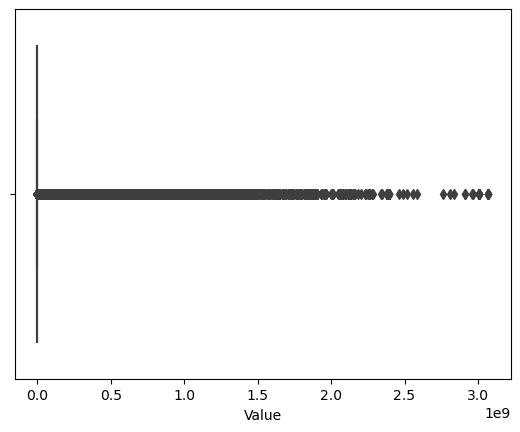

In [29]:
import seaborn as sns
sns.boxplot(x=df_test['Value'])

<AxesSubplot: xlabel='PopTotal'>

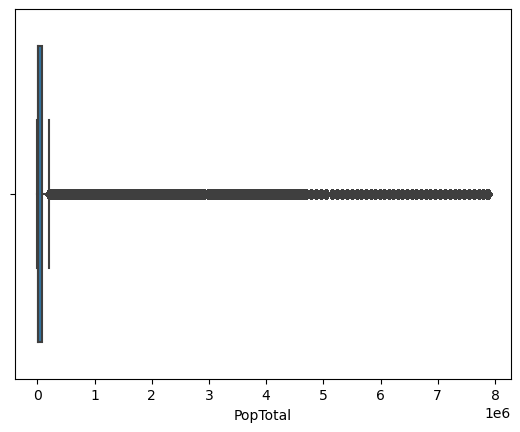

In [30]:
sns.boxplot(x=df_test['PopTotal'])

In [31]:
Q1 =  df['Value'].quantile(0.25) # 1º Quartile
Q3 =  df['Value'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['Value'] < (Q1-(1.5*IQR))]['Value'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['Value'] > (Q3+(1.5*IQR))]['Value'].count())



Interquartile range =  154553.7
Numerber of outliers in balance column below the lower whisker : 0
Numerber of outliers above balance column the uper whisker  : 744009


In [32]:
for i in df_test.columns.tolist():
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR 
    UTV = Q3 + 1.5 * IQR 
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : Value
Interquartile range IQR                             : 154553.7
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 744009
Total Numbers of Ourliers                           : 744009


Column Name                                         : PopMale
Interquartile range IQR                             : 40874.159
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 704104
Total Numbers of Ourliers                           : 704104


Column Name                                         : PopFemale
Interquartile range IQR                             : 41126.212
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 706111
Total Numbers of Ourliers                           : 706111


Column Name                                         : PopTotal
Interquartile ran

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_transpose = df_test.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
Value,4573719.00,2537688.45,30917453.27,0.00,2378.00,22563.00,156931.70,3070645412.97
PopMale,4573719.00,118179.52,422690.04,20.80,2304.23,8407.83,43178.39,3974824.83
PopFemale,4573719.00,116358.45,412660.65,21.39,2296.61,8556.55,43422.82,3908976.96
PopTotal,4573719.00,234537.97,835299.38,42.23,4596.02,16945.06,86422.24,7883801.79
PopDensity,4573719.00,157.52,762.21,0.63,21.36,59.07,122.66,22111.67


## Removing necesary Outliners

In [34]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    #We only remove the rows which are outliers in 2 or more columns.
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [35]:
indexes = df_test.loc[detect_outliers(df_test,df_test.columns)]
print("Number of rows to be delete are :",len(indexes.index.tolist()))

Number of rows to be delete are : 702369


In [36]:
df = df.drop(indexes.index.tolist(), axis=0).reset_index(drop=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871350 entries, 0 to 3871349
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        int64  
 5   Value       float64
 6   Flag        int64  
 7   Location    int64  
 8   Variant     int64  
 9   PopMale     float64
 10  PopFemale   float64
 11  PopTotal    float64
 12  PopDensity  float64
dtypes: float64(5), int64(8)
memory usage: 384.0 MB


# Clasification:

<AxesSubplot: >

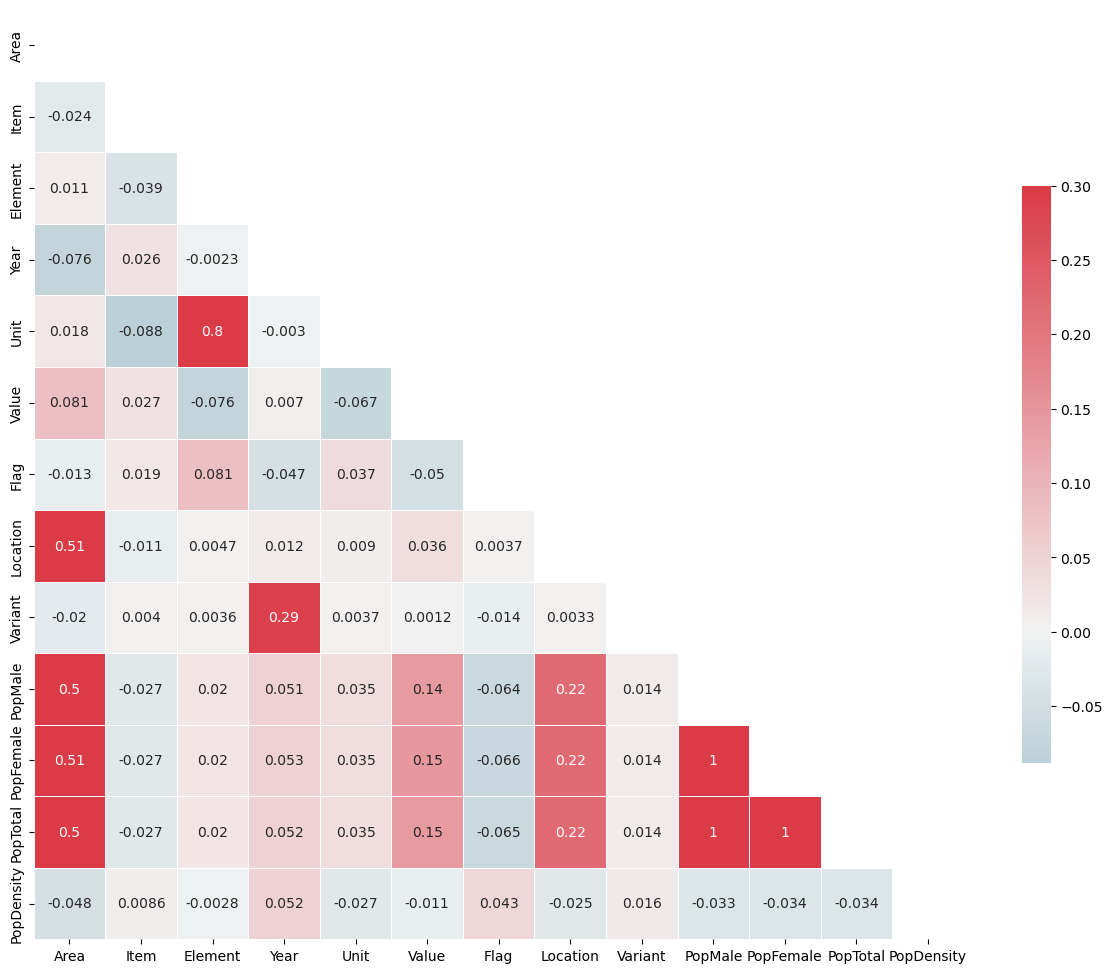

In [38]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

## Splitting data

In [39]:
df_new = df.drop(['Area','Flag'], axis=1)[0:-2000000]

In [40]:
from sklearn.model_selection import train_test_split
X = df_new.drop('Variant', axis=1)
y = df_new[['Variant']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (1497080, 10)
y train data (1497080, 1)
x test data  (374270, 10)
y test data  (374270, 1)


### Logistic Regression

In [41]:
model = LogisticRegression().fit(X_train, y_train)
print("Stats for logistic Regression : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for logistic Regression : 
Train Accuracy : 71.55449274587863 %
Test Accuracy : 71.49063510300051 %


In [ ]:
model = svm.SVC(decision_function_shape='ovo').fit(X_train, y_train)
print("Stats for SVM : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

In [ ]:
model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print("Stats for KNN : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)
print("Stats for Decision tree : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")